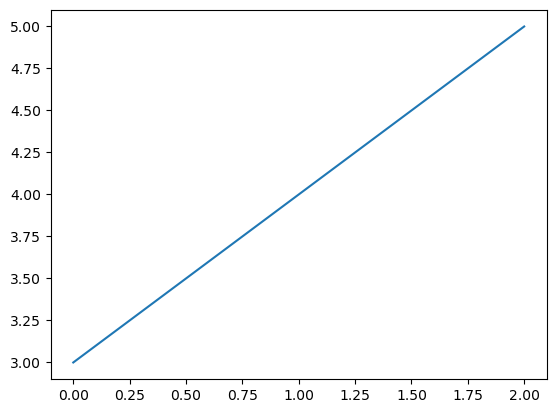

In [12]:
#標準寫法
import matplotlib.pyplot as plt

# 1.製作figure
fig = plt.figure()

# 2.在1.的figure上製作一個axes
ax_1 = fig.add_subplot(1, 1, 1)

# 3.將圖的數據儲存在axes中
X = [0, 1, 2]
Y = [3, 4, 5]
ax_1.plot(X, Y)

# 4.顯示圖
plt.show()

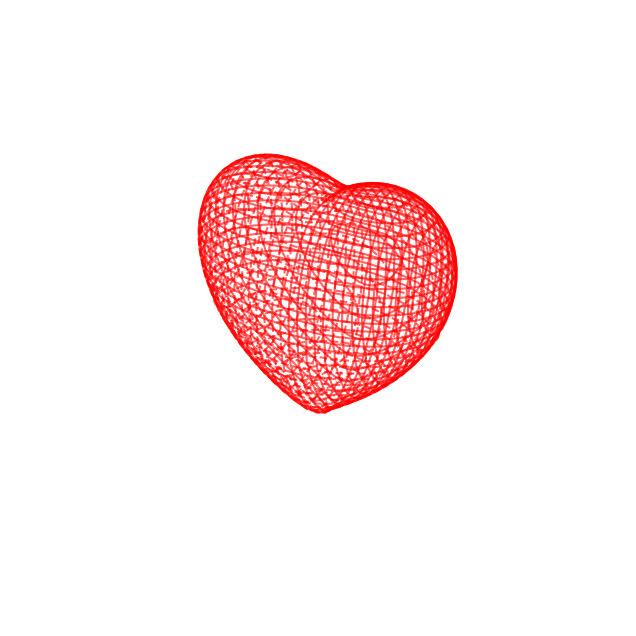

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 定义3D心形隐式方程
def heart_3d(x, y, z):
    return (x**2 + (9/4)*y**2 + z**2 - 1)**3 - x**2 * z**3 - (9/80)*y**2 * z**3

def plot_3d_heart_animated():
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    bound = 1.5
    n = 100
    A = np.linspace(-bound, bound, n)
    B = np.linspace(-bound, bound, n)
    A1, A2 = np.meshgrid(A, B)

    # 绘制等高线数据一次保存，避免每帧重新计算
    z_slices = np.linspace(-bound, bound, 40)
    y_slices = np.linspace(-bound, bound, 40)
    x_slices = np.linspace(-bound, bound, 40)
    contours = []

    # 预先绘制所有等高线，获取等高线对象后隐藏它们，动画时重新显示
    for z in z_slices:
        Z = heart_3d(A1, A2, z)
        cset = ax.contour(A1, A2, Z + z, [z], zdir='z', colors='red', alpha=0.6)
        contours.append(cset)

    for y in y_slices:
        Y = heart_3d(A1, y, A2)
        cset = ax.contour(A1, Y + y, A2, [y], zdir='y', colors='red', alpha=0.6)
        contours.append(cset)

    for x in x_slices:
        X = heart_3d(x, A1, A2)
        cset = ax.contour(X + x, A1, A2, [x], zdir='x', colors='red', alpha=0.6)
        contours.append(cset)

    ax.set_xlim(-bound, bound)
    ax.set_ylim(-bound, bound)
    ax.set_zlim(-bound, bound)
    ax.set_box_aspect([1,1,1])
    ax.axis('off')

    def update(frame):
        ax.view_init(elev=30, azim=frame)  # elev 固定俯视角度， azim 旋转横向角度
        return []

    ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), interval=50)

    plt.show()

plot_3d_heart_animated()
